In [1]:
## Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
## Importing the dataset
df = pd.read_csv(r"C:\Users\sumit\Desktop\vgsales\vgsales.csv",index_col='Rank')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [4]:
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [5]:
df.drop(['Name'], axis=1, inplace=True)
df

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,
1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16596,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [6]:
# Checking for null values in the dataset
df.isnull().sum()

Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
df = df.dropna(axis=0)

In [8]:
df.isnull().values.any()

False

In [9]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [11]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [12]:
counts = df['Publisher'].value_counts()

In [13]:
df['Publisher'] = df['Publisher'].apply(lambda x:'Small Publisher ' if counts[x] < 50 else x)

C:\Users\sumit\AppData\Local\Temp\ipykernel_32652\733750057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Publisher'] = df['Publisher'].apply(lambda x:'Small Publisher ' if counts[x] < 50 else x)


In [14]:
df['Publisher'].value_counts()

Small Publisher                           3319
Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Enter

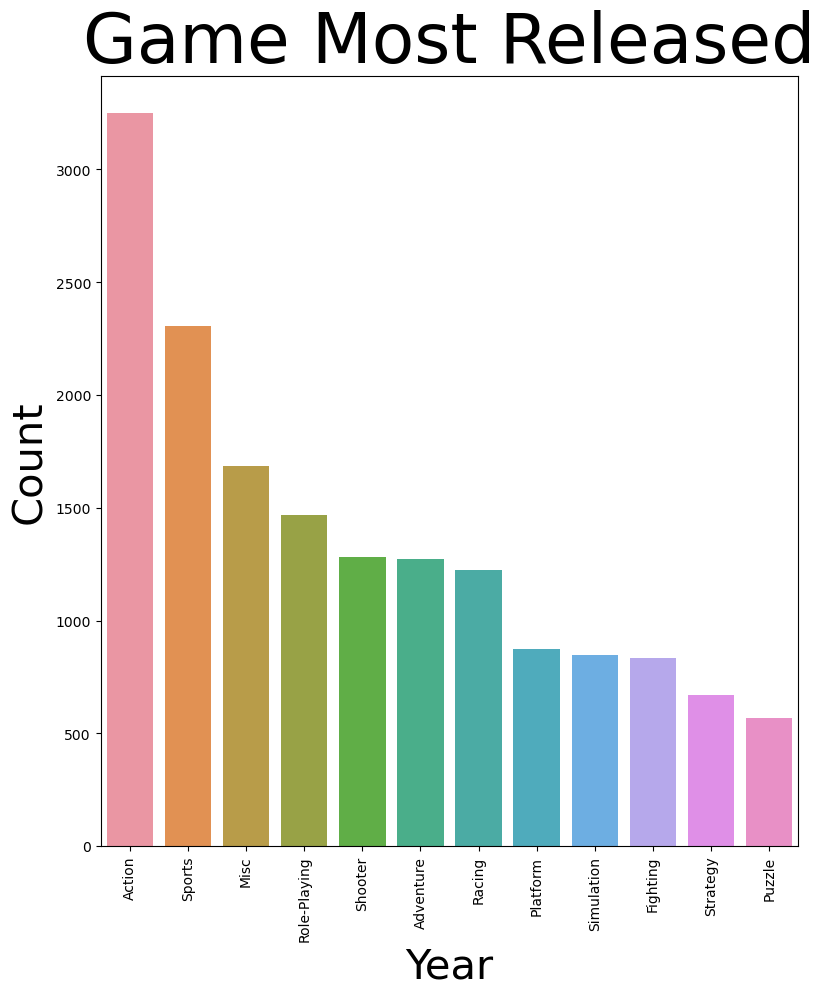

In [15]:
#This Section of the code tells which game has been released the most.
plt.figure(figsize=(9,10))
sns.countplot(x='Genre',data=df,order=df['Genre'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Game Most Released',fontsize=50)
plt.ylabel('Count',fontsize=30)
plt.xlabel('Year',fontsize=30)
plt.show()

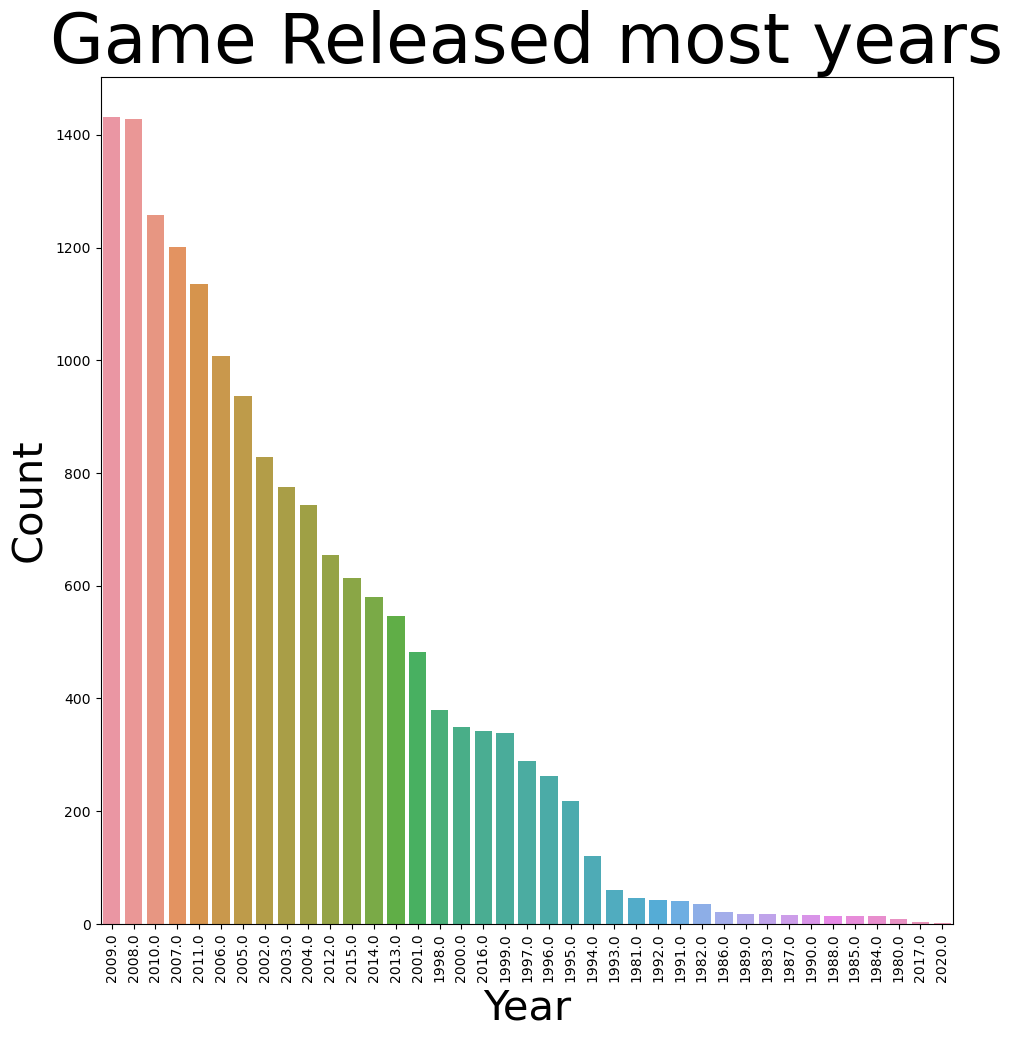

In [16]:
#This section of the code shows that in which year the game is released the most.
plt.figure(figsize=(11,11))
sns.countplot(x='Year',data=df, order=df.groupby(by=['Year'])['Publisher'].count().sort_values(ascending=False).index)
plt.xticks(rotation='vertical')
plt.title('Game Released most years',fontsize=50)
plt.ylabel('Count',fontsize=30)
plt.xlabel('Year',fontsize=30)
plt.show()

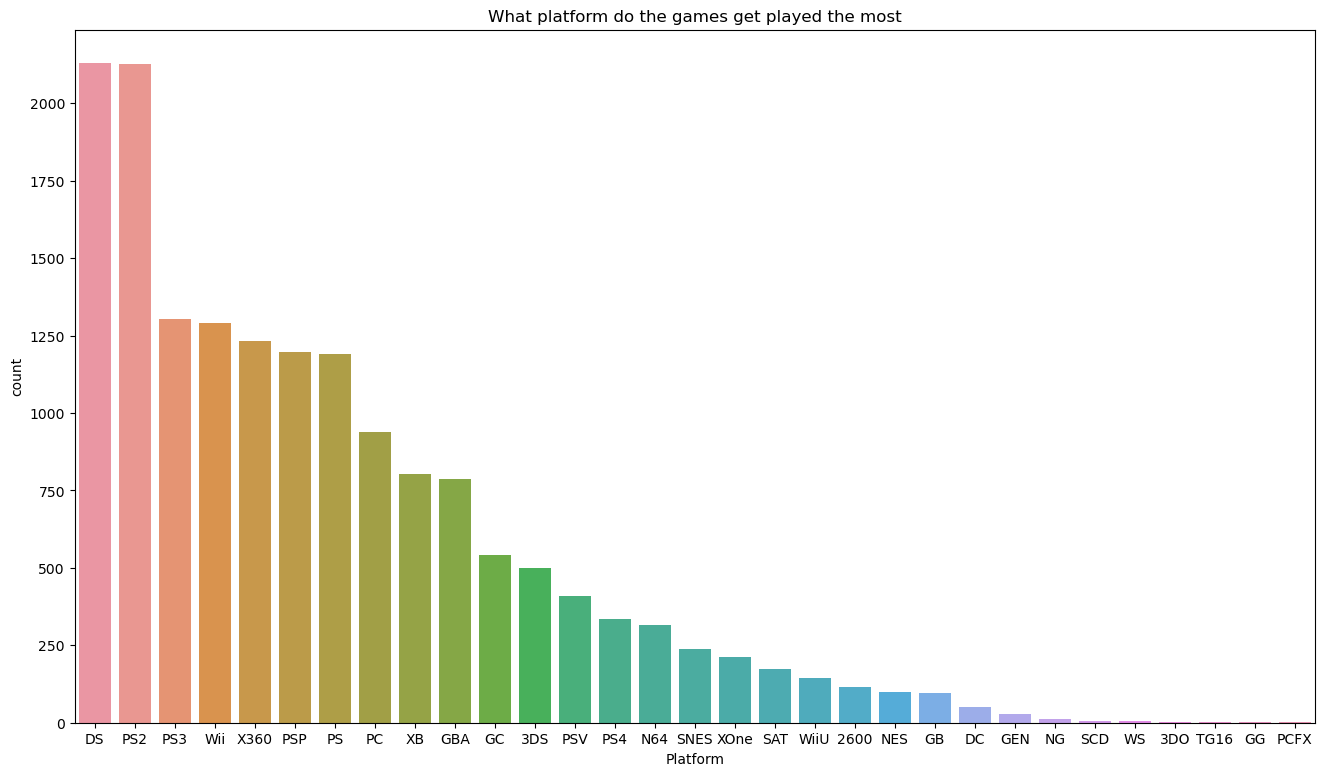

In [17]:
plt.figure(figsize=(16,9))
plt.title('What platform do the games get played the most')
sns.countplot(data=df,x='Platform',order =df['Platform'].value_counts().index)
plt.show()

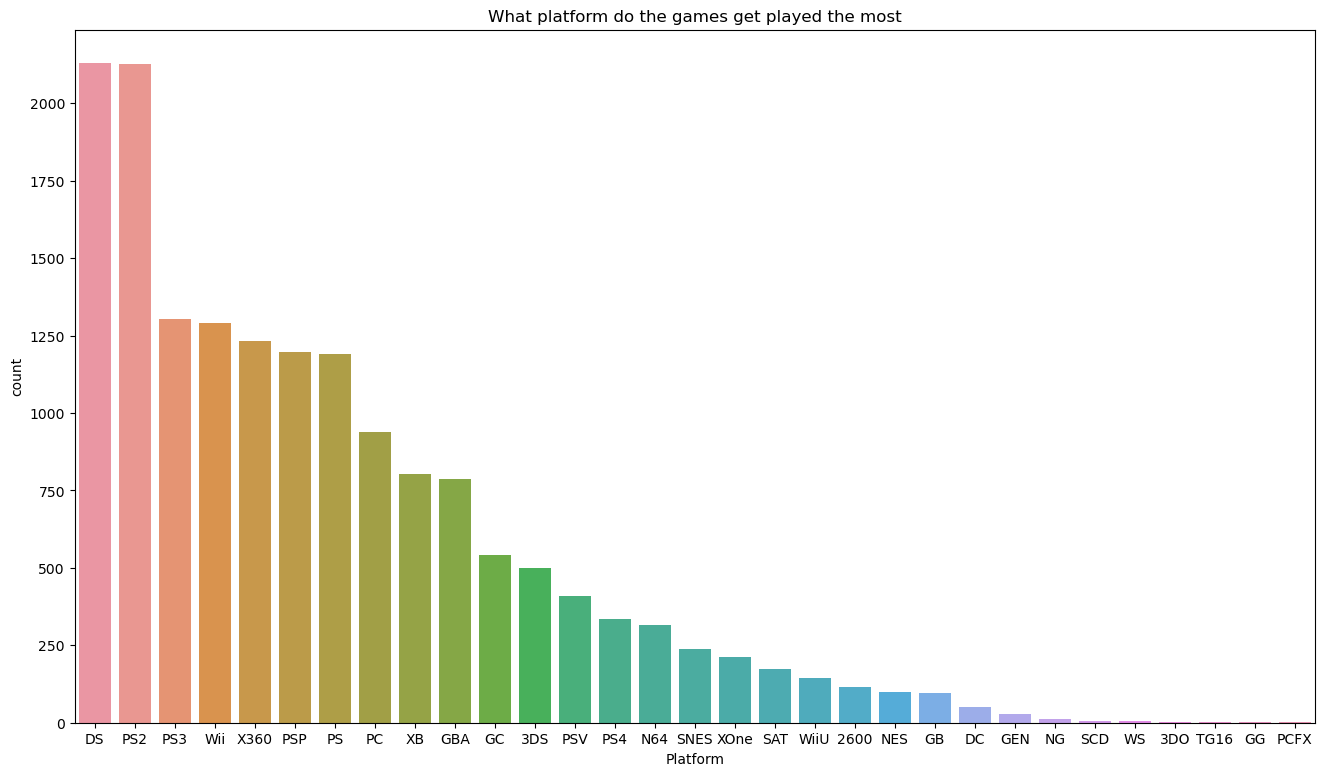

In [18]:
plt.figure(figsize=(16,9))
plt.title('What platform do the games get played the most')
sns.countplot(data=df,x='Platform',order =df['Platform'].value_counts().index)
plt.show()

In [19]:
df_year = df.groupby(by=['Year'])['Global_Sales'].sum()     #Note data grouping by year and global_sales to aggregate data efficiently.
df_year = df_year.reset_index()

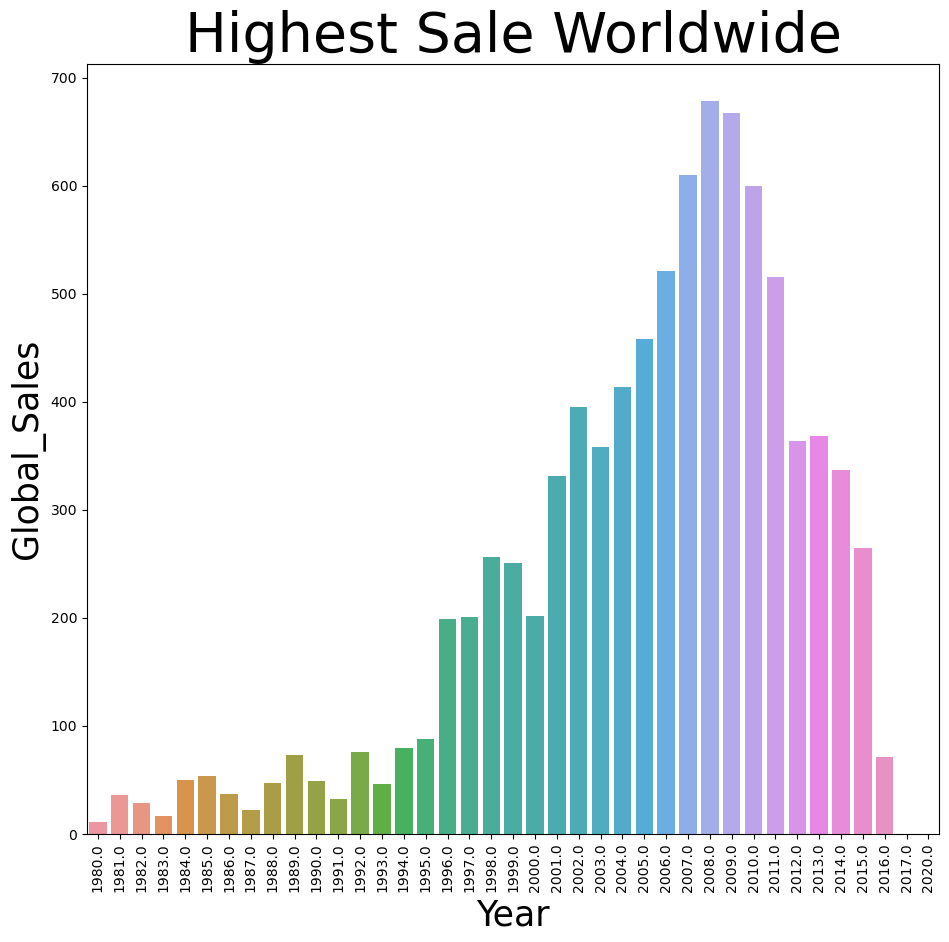

In [20]:
plt.figure(figsize=(11, 10))
sns.barplot(x="Year", y="Global_Sales", data=df_year)   #Note use of barplot which allows us to comapre different sets of data among different groups easily.
plt.xticks(rotation='vertical')
plt.title('Highest Sale Worldwide',fontsize=40)         #Note labelling the data
plt.ylabel('Global_Sales',fontsize=25)                  #Note labelling of y-axis
plt.xlabel('Year',fontsize=25)                          #Note labelling of x_axis
plt.show()

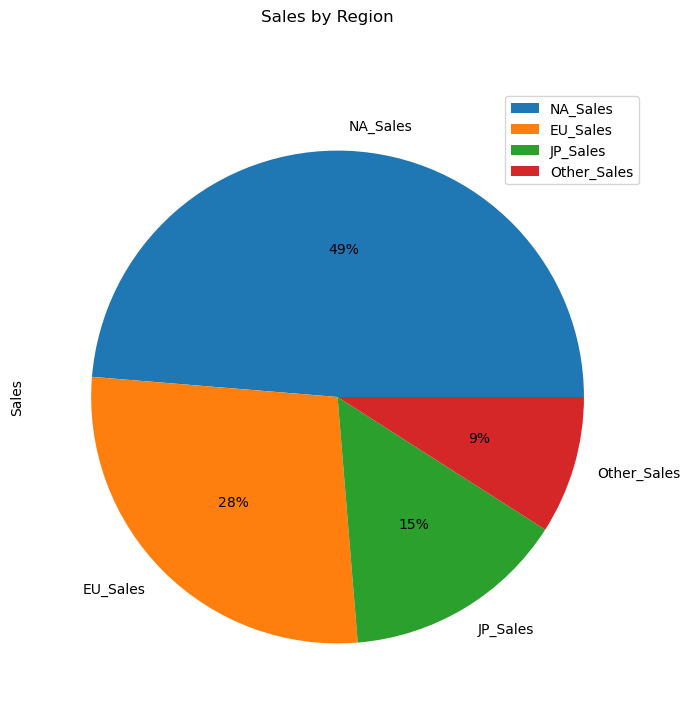

In [21]:
pie_df = pd.DataFrame([4292.95, 2434.13, 1291.02, 797.75], index=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], columns=['Sales'])
pie_plot = pie_df.plot(kind='pie', subplots=True, figsize=(8,8), autopct='%1.0f%%', title='Sales by Region')
pie_plot;

In [22]:
merged_sales=df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby('Genre').sum().sort_values('NA_Sales', ascending=False)
merged_sales.index.name = 'Genre'
merged_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861.77,516.48,158.65,184.92
Sports,670.09,371.34,134.76,132.65
Shooter,575.16,310.45,38.18,101.90
Platform,445.99,200.65,130.65,51.51
Misc,396.92,211.77,106.67,73.92
Racing,356.93,236.31,56.61,76.68
Role-Playing,326.50,187.57,350.29,59.38
Fighting,220.74,100.00,87.15,36.19
Simulation,181.78,113.02,63.54,31.36


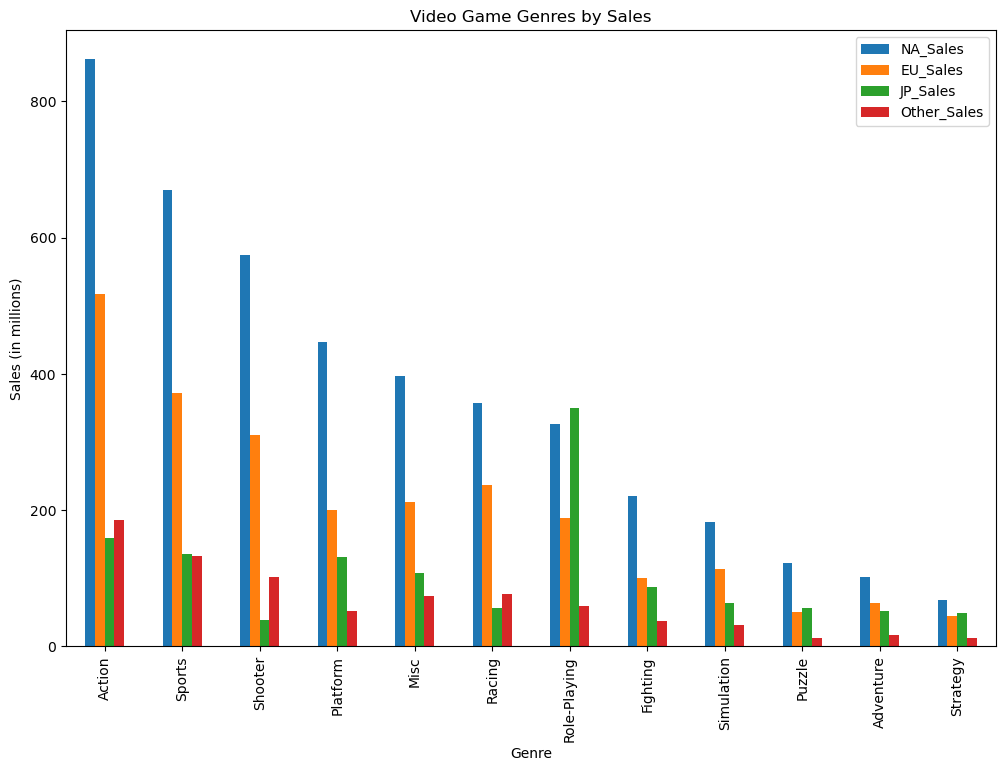

In [23]:
merged_sales.plot(kind='bar', figsize=(12,8))
plt.ylabel('Sales (in millions)')
plt.title('Video Game Genres by Sales');


In [24]:
#Converting the text data into numerics

df = pd.get_dummies(df, columns = ["Platform", "Genre", "Publisher"], drop_first=True)

In [25]:
df.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,...,Publisher_SquareSoft,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Unknown,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_Zoo Digital Publishing
Rank,,,,,,,,,,,,,,,,,,,,,
1,2006.0,41.49,29.02,3.77,8.46,82.74,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1985.0,29.08,3.58,6.81,0.77,40.24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008.0,15.85,12.88,3.79,3.31,35.82,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009.0,15.75,11.01,3.28,2.96,33.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1996.0,11.27,8.89,10.22,1.00,31.37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
x = df.loc[:,df.columns!="Global_Sales"]
type(x)
y = df['Global_Sales']
type(y)


pandas.core.series.Series

In [27]:
x

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Publisher_SquareSoft,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Unknown,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_Zoo Digital Publishing
Rank,,,,,,,,,,,,,,,,,,,,,
1,2006.0,41.49,29.02,3.77,8.46,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1985.0,29.08,3.58,6.81,0.77,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008.0,15.85,12.88,3.79,3.31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009.0,15.75,11.01,3.28,2.96,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1996.0,11.27,8.89,10.22,1.00,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,2002.0,0.01,0.00,0.00,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16597,2003.0,0.01,0.00,0.00,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16598,2008.0,0.00,0.00,0.00,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y

Rank
1        82.74
2        40.24
3        35.82
4        33.00
5        31.37
         ...  
16596     0.01
16597     0.01
16598     0.01
16599     0.01
16600     0.01
Name: Global_Sales, Length: 16291, dtype: float64

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
x = scaler.fit_transform(x)

In [31]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,-0.069538,50.126469,56.691515,11.835597,44.253501,-0.013571,-0.177759,-0.056588,-0.387936,-0.077394,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
1,-3.670217,35.036615,6.739357,21.583251,3.796218,-0.013571,-0.177759,-0.056588,-0.387936,-0.077394,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
2,0.273384,18.949687,25.000169,11.899727,17.159222,-0.013571,-0.177759,-0.056588,-0.387936,-0.077394,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
3,0.444845,18.828093,21.328372,10.264430,15.317863,-0.013571,-0.177759,-0.056588,-0.387936,-0.077394,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
4,-1.784147,13.380668,17.165692,32.517296,5.006254,-0.013571,-0.177759,-0.056588,-0.387936,12.920853,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16286,-0.755382,-0.310852,-0.290075,-0.252776,-0.254771,-0.013571,-0.177759,-0.056588,-0.387936,-0.077394,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
16287,-0.583921,-0.310852,-0.290075,-0.252776,-0.254771,-0.013571,-0.177759,-0.056588,-0.387936,-0.077394,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
16288,0.273384,-0.323011,-0.290075,-0.252776,-0.254771,-0.013571,-0.177759,-0.056588,-0.387936,-0.077394,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156
16289,0.616306,-0.323011,-0.270439,-0.252776,-0.254771,-0.013571,-0.177759,-0.056588,2.577745,-0.077394,...,-0.056588,-0.213782,-0.161078,-0.145558,-0.244367,-0.078589,-0.061809,-0.099907,-0.11619,-0.080156


In [32]:
# Splitting the dataset into independent and dependent vaiables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Decision Tree Regression

In [33]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth=5)
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

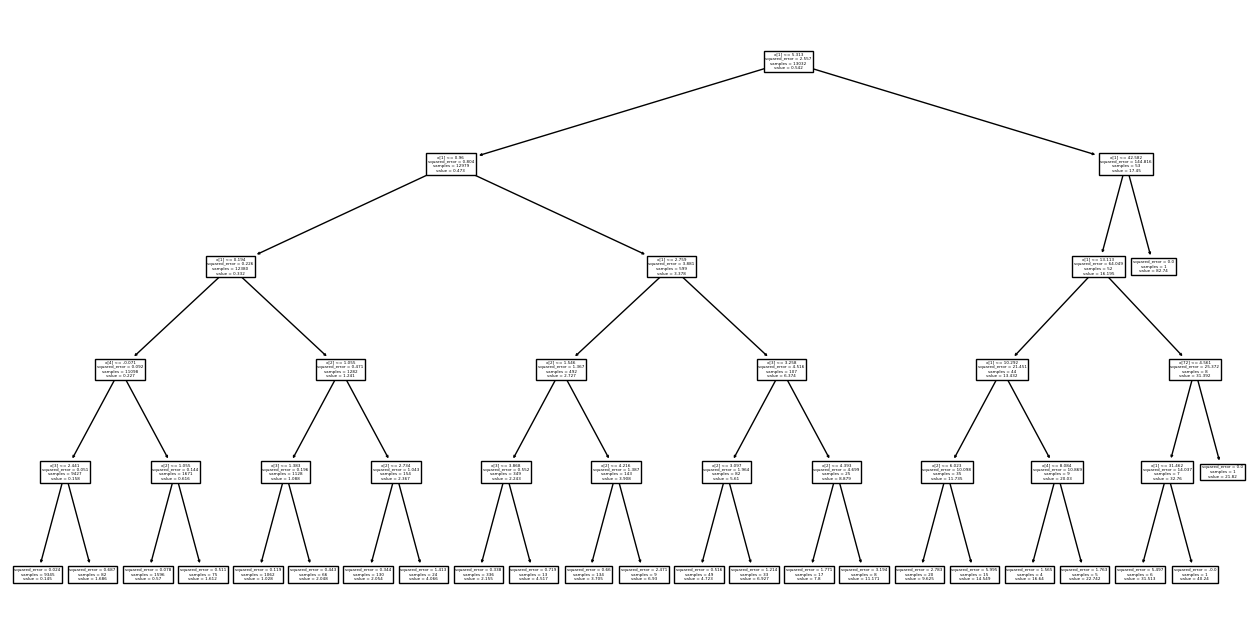

In [34]:
plt.figure(figsize=(16,8))
tree.plot_tree(regtree)
plt.show()

In [35]:
#Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

In [36]:
#Measuring accuracy
from sklearn.metrics import mean_squared_error, r2_score


#Error on test data set
print(mean_squared_error(y_test, test_pred))
print(r2_score(y_test, test_pred))

0.20678199254513221
0.8993986078637807


In [37]:
#Error on Train Dataset
print(mean_squared_error(y_train, train_pred))
print(r2_score(y_train, train_pred))


0.09434185084160726
0.9630999411226727


In [38]:
#Minimum Observation at the internal node approach

regtree2 = tree.DecisionTreeRegressor(min_samples_split = 4)
regtree2.fit(x_train, y_train)

#prediction
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

#error
print(mean_squared_error(y_test, test_pred2))
print(r2_score(y_test, test_pred2))

0.16277812723739388
0.9208069038901716


In [39]:
#Error on Train Dataset
print(mean_squared_error(y_train, train_pred2))
print(r2_score(y_train, train_pred2))


0.003564240587272355
0.9986059136390686


In [40]:
#Minimum observation at the leaf node approach
regtree3= tree.DecisionTreeRegressor(min_samples_leaf = 3)
regtree3.fit(x_train, y_train)

#prediction
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

#error
print(mean_squared_error(y_test, test_pred3))
print(r2_score(y_test, test_pred3))

0.22530133027253996
0.8903887751704846


In [41]:
#Error on Train Dataset
print(mean_squared_error(y_train, train_pred3))
print(r2_score(y_train, train_pred3))


0.13468576773999308
0.9473201689896049


In [42]:
#TAKING COMBINED HYPERPARAMETER
regtree4= tree.DecisionTreeRegressor(max_depth=20, min_samples_split=5,min_samples_leaf = 5)
regtree4.fit(x_train, y_train)

#prediction
test_pred4 = regtree4.predict(x_test)
train_pred4 = regtree4.predict(x_train)

#error
print(mean_squared_error(y_test, test_pred4))
print(r2_score(y_test, test_pred4))

0.17765585741993575
0.9135687476572778


In [43]:
#Error on Train Dataset
print(mean_squared_error(y_train, train_pred4))
print(r2_score(y_train, train_pred4))


0.2204841884246321
0.9137617137907528


In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [45]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators 

In [47]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [49]:
#prediction
test_pred5 = rfr.predict(x_test)
train_pred5 = rfr.predict(x_train)

#error
print(mean_squared_error(y_test, test_pred5))
print(r2_score(y_test, test_pred5))

0.023898538381343887
0.9883731353896336


In [50]:
#Error on Train Dataset
print(mean_squared_error(y_train, train_pred5))
print(r2_score(y_train, train_pred5))


0.029867122577504422
0.9883180309504782
